In [582]:
import pandas as pd
import os

dir_src = './raw'
medi_src = dir_src + '/전국 병의원 및 약국 현황 2023.12/1.병원정보서비스.csv'

In [583]:
medi_df = pd.read_csv(medi_src, encoding='cp949').drop(labels=['암호화요양기호', '전화번호', '병원홈페이지', '개설일자'], axis=1)

In [584]:
# 코드 열 드랍 (코드명은 제외)

medi_df = medi_df.drop(labels=['종별코드', '시도코드', '시군구코드', '우편번호', '주소'], axis=1)
medi_df.head(2)

,요양기관명,종별코드명,시도코드명,시군구코드명,읍면동,총의사수,의과일반의 인원수,의과인턴 인원수,의과레지던트 인원수,의과전문의 인원수,...,치과인턴 인원수,치과레지던트 인원수,치과전문의 인원수,한방일반의 인원수,한방인턴 인원수,한방레지던트 인원수,한방전문의 인원수,조산사 인원수,좌표(X),좌표(Y)
0,가톨릭대학교 성빈센트병원,상급종합,경기,수원팔달구,지동,375,0,32,90,247,...,0,0,6,0,0,0,0,0,127.027427,37.277985
1,가톨릭대학교인천성모병원,상급종합,인천,인천부평구,부평동,338,0,23,67,245,...,0,0,2,0,0,0,0,0,126.724899,37.484831


In [585]:
medi_df['시도코드명'].unique()

array(['경기', '인천', '강원', '서울', '대구', '경남', '부산', '충남', '전북', '광주', '대전',
       '충북', '울산', '전남', '경북', '세종시', '제주'], dtype=object)

In [586]:
medi_df.columns

Index(['요양기관명', '종별코드명', '시도코드명', '시군구코드명', '읍면동', '총의사수', '의과일반의 인원수',
       '의과인턴 인원수', '의과레지던트 인원수', '의과전문의 인원수', '치과일반의 인원수', '치과인턴 인원수',
       '치과레지던트 인원수', '치과전문의 인원수', '한방일반의 인원수', '한방인턴 인원수', '한방레지던트 인원수',
       '한방전문의 인원수', '조산사 인원수', '좌표(X)', '좌표(Y)'],
      dtype='object')

In [587]:
medi_df['종별코드명'].unique()

array(['상급종합', '종합병원', '병원', '요양병원', '정신병원', '의원', '치과병원', '치과의원', '조산원',
       '보건소', '보건지소', '보건진료소', '보건의료원', '한방병원', '한의원'], dtype=object)

In [588]:
# medi_df['종별코드명'].value_counts().sort_values(ascending=False)

In [589]:
# 결측치 확인
medi_df.isnull().sum()

요양기관명            0
종별코드명            0
시도코드명            0
시군구코드명           0
읍면동           1665
총의사수             0
의과일반의 인원수        0
의과인턴 인원수         0
의과레지던트 인원수       0
의과전문의 인원수        0
치과일반의 인원수        0
치과인턴 인원수         0
치과레지던트 인원수       0
치과전문의 인원수        0
한방일반의 인원수        0
한방인턴 인원수         0
한방레지던트 인원수       0
한방전문의 인원수        0
조산사 인원수          0
좌표(X)          696
좌표(Y)          696
dtype: int64

In [590]:
# 위치 좌표 없는 데이터는?

medi_df[medi_df['좌표(X)'].isnull()].head() # ->기준을 모르겠다..

,요양기관명,종별코드명,시도코드명,시군구코드명,읍면동,총의사수,의과일반의 인원수,의과인턴 인원수,의과레지던트 인원수,의과전문의 인원수,...,치과인턴 인원수,치과레지던트 인원수,치과전문의 인원수,한방일반의 인원수,한방인턴 인원수,한방레지던트 인원수,한방전문의 인원수,조산사 인원수,좌표(X),좌표(Y)
158,상무병원,종합병원,광주,광주서구,치평동,27,0,0,0,27,...,0,0,0,0,0,0,0,0,NaN,NaN
451,경대자연병원,병원,대구,대구북구,연경동,2,0,0,0,2,...,0,0,0,0,0,0,0,0,NaN,NaN
678,리베르여성병원,병원,경기,수원영통구,신동,5,0,0,0,5,...,0,0,0,0,0,0,0,0,NaN,NaN
956,서울필병원,병원,서울,강서구,내발산동,6,0,0,0,6,...,0,0,0,0,0,0,0,0,NaN,NaN
992,솔튼병원,병원,전남,목포시,산정동,5,0,0,0,5,...,0,0,0,0,0,0,0,0,NaN,NaN


In [591]:
medi_df.shape

(77139, 21)

In [592]:
# 서울 드랍
medi_nons_df = medi_df[medi_df['시도코드명']!='서울']

# 시도기준 기관수 집계
hos_count = medi_nons_df.groupby('시도코드명')[['요양기관명']].count()
hos_count.columns = ['의료기관수']
hos_count

,의료기관수
시도코드명,
강원,1952
경기,17337
경남,4203
경북,3381
광주,2306
대구,4087
대전,2315
부산,5510
세종시,458


In [593]:
# 시도기준 의사 수 집계
doc_count = medi_nons_df.groupby('시도코드명')[['총의사수']].sum()
doc_count

,총의사수
시도코드명,
강원,4039
경기,35562
경남,8368
경북,5552
광주,5519
대구,8841
대전,5327
부산,11918
세종시,792


In [594]:
# 기관수, 의사수 데이터 합치기
hos_count = hos_count.join(doc_count)
hos_count

,의료기관수,총의사수
시도코드명,,
강원,1952,4039
경기,17337,35562
경남,4203,8368
경북,3381,5552
광주,2306,5519
대구,4087,8841
대전,2315,5327
부산,5510,11918
세종시,458,792


In [595]:
pops_src = dir_src  + '/행정구역_시군구_별__성별_인구수_20240305194331.csv'
pops_df = pd.read_csv(pops_src, header=1) # 인구 데이터 로드

pops_df = pops_df.loc[2:]
pops_df = pops_df.sort_values(by='행정구역(시군구)별', axis=0)
pops_df = pops_df.set_index('행정구역(시군구)별')
# pops_df

In [596]:
pops_df.index = hos_count.index
pops_df

,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도코드명,,,
강원,1527807,768449,759358
경기,13630821,6855895,6774926
경남,3251158,1636987,1614171
경북,2554324,1290298,1264026
광주,1419237,700896,718341
대구,2374960,1166803,1208157
대전,1442216,719292,722924
부산,3293362,1605431,1687931
세종시,386525,192524,194001


In [597]:
# 다 합치기
joined_count = hos_count.join(pops_df[['총인구수 (명)']])
joined_count.head()

,의료기관수,총의사수,총인구수 (명)
시도코드명,,,
강원,1952,4039,1527807
경기,17337,35562,13630821
경남,4203,8368,3251158
경북,3381,5552,2554324
광주,2306,5519,1419237


In [598]:
joined_count['기관비 (백명)'] = joined_count['의료기관수'] / joined_count['총인구수 (명)'] * 100
joined_count['의사비 (백명)'] = joined_count['총의사수'] / joined_count['총인구수 (명)'] * 100
joined_count

,의료기관수,총의사수,총인구수 (명),기관비 (백명),의사비 (백명)
시도코드명,,,,,
강원,1952,4039,1527807,0.127765,0.264366
경기,17337,35562,13630821,0.127190,0.260894
경남,4203,8368,3251158,0.129277,0.257385
경북,3381,5552,2554324,0.132364,0.217357
광주,2306,5519,1419237,0.162482,0.388871
대구,4087,8841,2374960,0.172087,0.372259
대전,2315,5327,1442216,0.160517,0.369362
부산,5510,11918,3293362,0.167306,0.361879
세종시,458,792,386525,0.118492,0.204903


In [599]:
import numpy as np

# hist, bin_edges = np.histogram(joined_count['기관비 (백명)'], bins=4)

hist, bin_edges = np.histogram(joined_count['의사비 (백명)'], bins=4)
hist, bin_edges

(array([5, 6, 1, 4], dtype=int64),
 array([0.20490266, 0.25089472, 0.29688679, 0.34287886, 0.38887092]))

In [600]:
doc_count_cats = pd.cut(joined_count['의사비 (백명)'], bins=bin_edges,
       labels=[4, 3, 2, 1], include_lowest=True)
doc_count_cats

시도코드명
강원     3
경기     3
경남     3
경북     4
광주     1
대구     1
대전     1
부산     1
세종시    4
울산     4
인천     3
전남     3
전북     2
제주     3
충남     4
충북     4
Name: 의사비 (백명), dtype: category
Categories (4, int64): [4 < 3 < 2 < 1]

In [601]:
joined_count['의사비 수준'] = doc_count_cats
joined_count

,의료기관수,총의사수,총인구수 (명),기관비 (백명),의사비 (백명),의사비 수준
시도코드명,,,,,,
강원,1952,4039,1527807,0.127765,0.264366,3
경기,17337,35562,13630821,0.127190,0.260894,3
경남,4203,8368,3251158,0.129277,0.257385,3
경북,3381,5552,2554324,0.132364,0.217357,4
광주,2306,5519,1419237,0.162482,0.388871,1
대구,4087,8841,2374960,0.172087,0.372259,1
대전,2315,5327,1442216,0.160517,0.369362,1
부산,5510,11918,3293362,0.167306,0.361879,1
세종시,458,792,386525,0.118492,0.204903,4


In [605]:
joined_count.sort_values(by=['의사비 수준', '의사비 (백명)'], ascending=True ,axis=0)

,의료기관수,총의사수,총인구수 (명),기관비 (백명),의사비 (백명),의사비 수준
시도코드명,,,,,,
세종시,458,792,386525,0.118492,0.204903,4
경북,3381,5552,2554324,0.132364,0.217357,4
충남,2805,5032,2130119,0.131683,0.236231,4
충북,2198,3813,1593469,0.137938,0.239289,4
울산,1425,2746,1103661,0.129116,0.248808,4
경남,4203,8368,3251158,0.129277,0.257385,3
제주,1032,1756,675252,0.152832,0.260051,3
전남,2630,4707,1804217,0.145770,0.260889,3
경기,17337,35562,13630821,0.127190,0.260894,3


In [ ]:
joined_count.describe()

,의료기관수,총의사수,총인구수 (명),기관비 (백명),의사비 (백명)
count,16.000000,16.000000,1.600000e+01,16.000000,16.000000
mean,3643.500000,7345.375000,2.621206e+06,0.142877,0.282825
std,3866.270175,8024.362536,3.056101e+06,0.018009,0.059030
min,458.000000,792.000000,3.865250e+05,0.118492,0.204903
25%,2136.500000,3982.500000,1.436471e+06,0.128778,0.246429
50%,2717.500000,5423.000000,1.779487e+06,0.135151,0.260891
75%,3820.000000,8116.000000,2.665096e+06,0.161008,0.326485
max,17337.000000,35562.000000,1.363082e+07,0.172087,0.388871


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.rcParams['figure.figsize'] = [6, 4]
sns.set(style='whitegrid')
sns.set_palette('pastel')
warnings.filterwarnings('ignore')


import matplotlib as mpl

mpl.rcParams['font.family'] = 'Pretendard'
mpl.rcParams['font.size'] = 25

mpl.rcParams['axes.unicode_minus'] = False

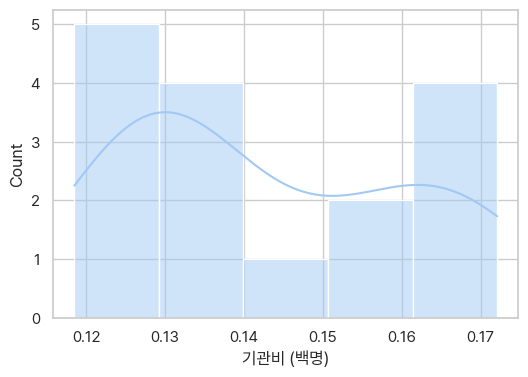

In [ ]:
# Histogram chart

# plt.hist(joined_count['의사비 (백명)'], alpha=.75, color='pink')

sns.histplot(data=joined_count, x='기관비 (백명)', kde=True)
plt.show()

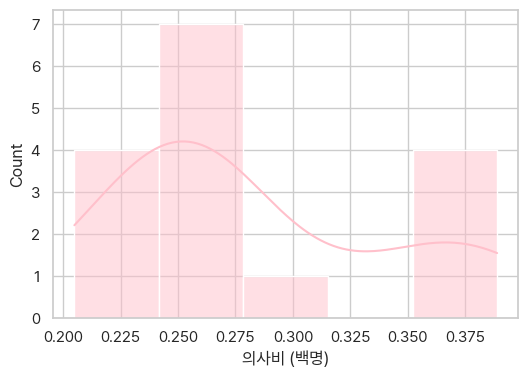

In [ ]:
sns.histplot(data=joined_count, x='의사비 (백명)', kde=True, color='pink')
plt.show()

In [ ]:
import folium

center = [35.95, 128.25]
m = folium.Map(location=center, zoom_start=7)

m

In [ ]:
joined_count.index

Index(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '세종시', '울산', '인천', '전남',
       '전북', '제주', '충남', '충북'],
      dtype='object', name='시도코드명')

In [ ]:
# 시도 좌표
geo_dict = {'강원':[37.8603672, 128.3115261], '경기':[37.4363177, 127.550802],
            '경남':[35.4414209, 128.2417453], '경북':[36.6308397,128.962578],
            '광주':[35.160032, 126.851338], '대구':[35.87139, 128.601763],
            '대전':[36.3504396, 127.3849508], '부산':[35.179816, 129.0750223],
            '세종시':[36.4803512, 127.2894325], '울산':[35.5394773, 129.3112994],
            '인천':[37.4559418, 126.7051505], '전남':[34.9007274, 126.9571667],
            '전북':[35.6910153, 127.2368291], '제주':[33.4273366, 126.5758344],
            '충남':[36.6173379, 126.8453965], '충북':[36.7853718, 127.6551404]}

In [ ]:
# DataFrame에서 지명과 일치하는 데이터 불러오기
joined_count.loc['충남']['의사비 (백명)']

0.2362309335769504

In [ ]:
# 마커 색, 크기 계산
# 1. 색 -> colors[int(joined_count.loc[지명]['의사비 수준'])]
colors = ['red', 'orange', 'yellow', 'blue', ''][::-1]

# 2. 직경 -> value * 75 -> joined_count.loc[지명]['의사비 (백명)']


# 지도에 표시
for key, val in geo_dict.items():
    num = round(joined_count.loc[key]['의사비 (백명)'], 3)
    r = (joined_count.loc[key]['의사비 (백명)'] * 100) - (joined_count.loc[key]['의사비 수준'])
    folium.CircleMarker(location=val,
                        color=colors[int(joined_count.loc[key]['의사비 수준'])],
                        radius=r,
                        popup=num, tooltip=key,
                        fill=True, fill_opacity=0.5).add_to(m)
m